In [1]:
# import analysis and visualization libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# import data table
ord_prod_full = pd.read_pickle(r'C:\Users\kacie\Box\Personal\CareerFoundry\Data Immersion\Achievement 4\Jupyter Folders\Data\Prepared Data\ord_prod_custC.pkl')

In [3]:
# list table columns 
ord_prod_full.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'Busiest_Days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'spending_mean',
       'spending_flag', 'frequency_median', 'frequency_flag', 'First Name',
       'Last Name', 'Gender', 'STATE', 'Age', 'date_joined', 'n_dependants',
       'fam_status', 'income', '_merge'],
      dtype='object')

## Visualizations for Order Timing

### Create bar graph for orders per day of week

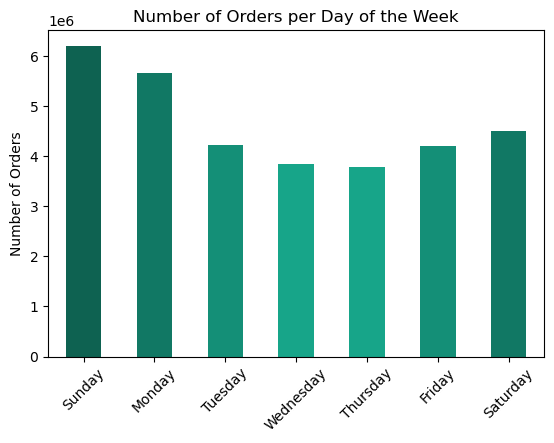

In [220]:
# create the bar graph with sorted x axis and assigned colors
order_day_bar = ord_prod_full['order_day_of_week'].value_counts().sort_index().plot.bar(color = ['#0E6251', '#117864', '#148F77', '#17A589', '#17A589', '#148F77', '#117864'])

plt.subplots_adjust(bottom=0.2)

# set the axis labels and title
order_day_bar.set_xlabel('')
order_day_bar.set_ylabel('Number of Orders')
order_day_bar.set_title('Number of Orders per Day of the Week')

# Set the x axis ticks
days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
order_day_bar.set_xticklabels(days, rotation=45)

# display the plot
plt.show()

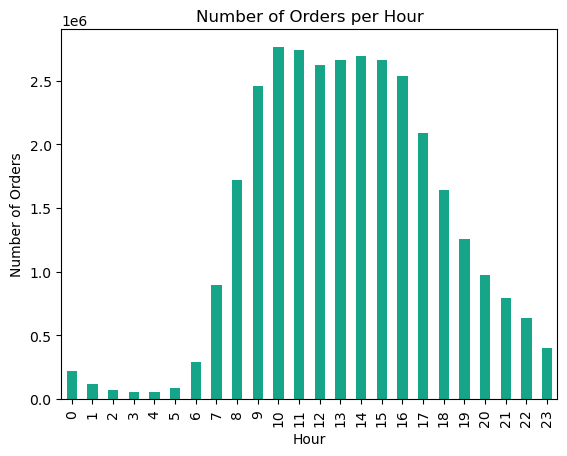

In [216]:
# create a bar graph for orders per hour

# create the bar graph with sorted x axis and assigned colors
order_hour_bar = ord_prod_full['order_hour'].value_counts().sort_index().plot.bar(color = '#17A589')

# set the axis labels and title
order_hour_bar.set_xlabel('Hour')
order_hour_bar.set_ylabel('Number of Orders')
order_hour_bar.set_title('Number of Orders per Hour')

# display the plot
plt.show()

In [26]:
# create a small subset of data to use for line graph visualization

# create random list
np.random.seed(4)
dev = np.random.rand(len(ord_prod_full)) <= 0.7

# create small and big tables
big = ord_prod_full[dev]
small = ord_prod_full[~dev]

In [27]:
small.shape

(9729960, 32)

In [28]:
ord_prod_full.shape

(32435059, 32)

In [33]:
# group order hour by prices
hour_price_full_agg = ord_prod_full.groupby('order_hour')['prices'].sum().reset_index()

In [34]:
# view table
hour_price_full_agg

,order_hour,prices
0,0,1708627.1
1,1,902987.5
2,2,540953.3
3,3,401331.1
4,4,417265.0
5,5,688439.9
6,6,2270680.7
7,7,6967055.9
8,8,13383026.7
9,9,19026013.7


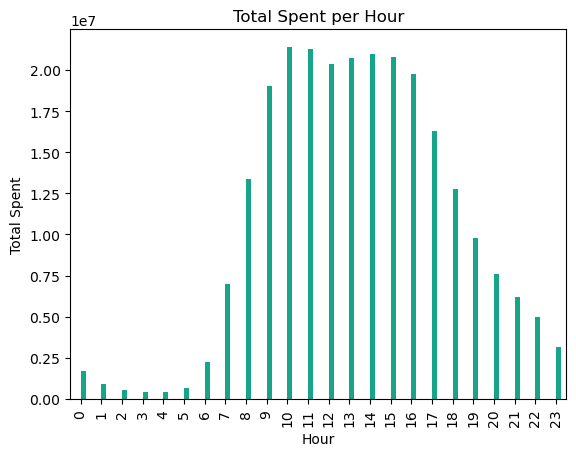

In [37]:
# plot price vs hour
hour_price_bar = hour_price_full_agg.plot.bar(color = '#17A589')

# set axis labels and title
hour_price_bar.set_xlabel('Hour')
hour_price_bar.set_ylabel('Total Spent')
hour_price_bar.set_title('Total Spent per Hour')

# remove legend
hour_price_bar.legend().set_visible(False)

In [38]:
# create table with counts of price_range_loc
ord_prod_full['price_range_loc'].value_counts()

price_range_loc
Mid-range product     21860860
Low-range product     10126321
High-range product      417678
Name: count, dtype: int64

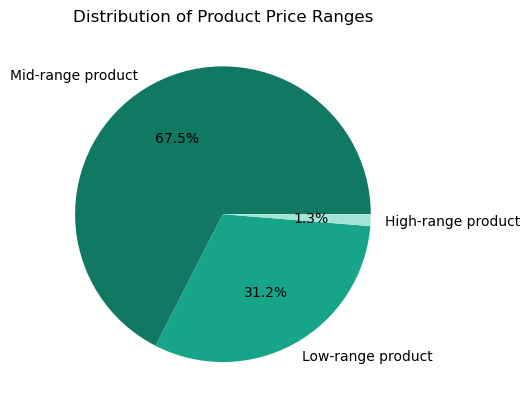

In [236]:
# create table of price range counts to use for pie chart
price_range_counts = ord_prod_full['price_range_loc'].value_counts()

# create pie chart with labels, precentages, and colored green
price_range_pie = plt.pie(price_range_counts, labels = price_range_counts.index, autopct='%1.1f%%', colors=['#117864', '#17A589', '#A3E4D7'])

# add title
plt.title('Distribution of Product Price Ranges')

# save figure
plt.savefig(r'C:\Users\kacie\Box\Personal\CareerFoundry\Data Immersion\Achievement 4\Jupyter Folders\New Visualzations\price_range_pie.png')


In [43]:
# view counts for department_id
ord_prod_full['department_id'].value_counts()

department_id
4.0     9479291
16.0    5398747
19.0    2887550
7.0     2688123
1.0     2234743
13.0    1875369
3.0     1172428
15.0    1068058
20.0    1051249
9.0      866627
17.0     738666
12.0     708927
14.0     703033
11.0     447572
18.0     423802
6.0      269253
5.0      153696
8.0       97716
21.0      69145
2.0       36291
10.0      34573
Name: count, dtype: int64

Text(0.5, 1.0, 'Orders by Department')

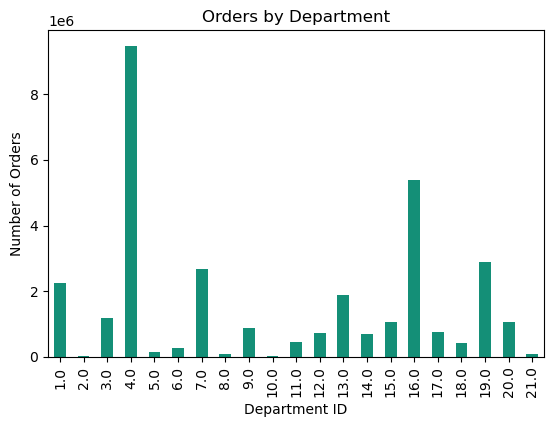

In [230]:
# create bar chart for orders per department
dep_ord_bar = ord_prod_full['department_id'].value_counts().sort_index().plot.bar(color = '#148F77')

# adjust plot size
plt.subplots_adjust(bottom=0.2)

# set axis labels and title
dep_ord_bar.set_xlabel('Department ID')
dep_ord_bar.set_ylabel('Number of Orders')
dep_ord_bar.set_title('Orders by Department')

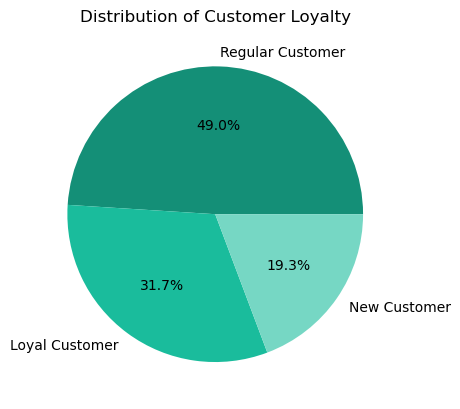

In [235]:
# create table with lyalty flag counts
loyal_counts = ord_prod_full['loyalty_flag'].value_counts()

# create pie chart for loyalty flag
plt.pie(loyal_counts,labels = loyal_counts.index, autopct='%1.1f%%', colors=['#148F77', '#1ABC9C', '#76D7C4'])

# create title
plt.title('Distribution of Customer Loyalty')

# save figure
plt.savefig(r'C:\Users\kacie\Box\Personal\CareerFoundry\Data Immersion\Achievement 4\Jupyter Folders\New Visualzations\loyal_pie.png')



In [46]:
# view counts for frequency flag
ord_prod_full['frequency_flag'].value_counts()

frequency_flag
Frequent Customer        22816041
Regular Customer          6929012
Non-Frequent Customer     2690006
Name: count, dtype: int64

In [47]:
# view counts for loyalty flag
ord_prod_full['loyalty_flag'].value_counts()

loyalty_flag
Regular Customer    15891507
Loyal Customer      10294027
New Customer         6249525
Name: count, dtype: int64

In [73]:
# Create table with price per order
loyalty_ord_prices = ord_prod_full.groupby(['loyalty_flag', 'user_id', 'order_id'])['prices'].sum().reset_index()

In [74]:
loyalty_ord_prices

,loyalty_flag,user_id,order_id,prices
0,Loyal Customer,27,-125,178.7
1,Loyal Customer,27,-120,218.1
2,Loyal Customer,27,-110,56.7
3,Loyal Customer,27,-107,118.2
4,Loyal Customer,27,-106,45.2
...,...,...,...,...
3025424,Regular Customer,206209,43,33.1
3025425,Regular Customer,206209,61,26.2
3025426,Regular Customer,206209,86,64.7
3025427,Regular Customer,206209,117,75.2


In [80]:
# create table with average price per user id
loyalty_cust_prices = loyalty_ord_prices.groupby(['loyalty_flag', 'user_id'])['prices'].mean().reset_index()

In [81]:
loyalty_cust_prices

,loyalty_flag,user_id,prices
0,Loyal Customer,27,87.567164
1,Loyal Customer,50,63.898214
2,Loyal Customer,54,74.923944
3,Loyal Customer,90,59.459322
4,Loyal Customer,140,126.990769
...,...,...,...
206204,Regular Customer,206200,106.077273
206205,Regular Customer,206201,111.434483
206206,Regular Customer,206202,73.404545
206207,Regular Customer,206207,101.931250


In [84]:
# create table with average price per loyalty flag
loyalty_avg_prices = loyalty_cust_prices.groupby('loyalty_flag')['prices'].mean().reset_index()

In [85]:
loyalty_avg_prices

,loyalty_flag,prices
0,Loyal Customer,88.892091
1,New Customer,76.861513
2,Regular Customer,82.469693


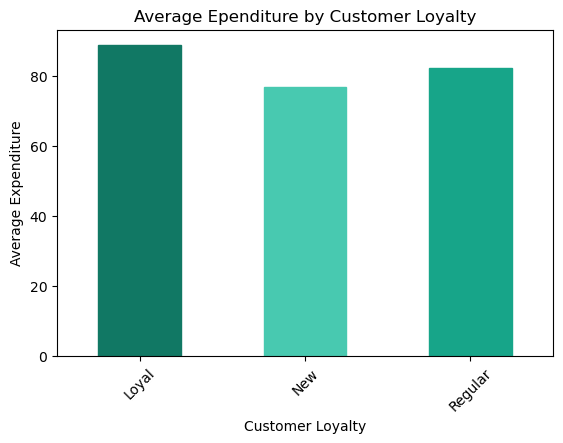

In [241]:
# create bar plot for average order price per loyalty flag
loyalty_price_bar = loyalty_avg_prices.sort_index().plot.bar()

# set axis labels and title
loyalty_price_bar.set_xlabel('Customer Loyalty')
loyalty_price_bar.set_ylabel('Average Expenditure')
loyalty_price_bar.set_title('Average Ependiture by Customer Loyalty')

# Set the x axis ticks
loyalty = ['Loyal', 'New', 'Regular']
loyalty_price_bar.set_xticklabels(loyalty, rotation=45)

# adjut plot size
plt.subplots_adjust(bottom=0.2)

# remove legend loyalty_price_bar.legend().set_visible(False)

# add colors
colors = ['#117864', '#48C9B0', '#17A589']
for bar, color in zip(loyalty_price_bar.containers[0], colors):
    bar.set_color(color)

In [98]:
# create table for loyalty flag order counts per day of week
Loyalty_day_group = ord_prod_full.groupby(['order_day_of_week', 'loyalty_flag']).size().unstack()

In [99]:
Loyalty_day_group 

loyalty_flag,Loyal Customer,New Customer,Regular Customer
order_day_of_week,,,
0,1756274,1281605,3171929
1,1845448,1068440,2752063
2,1353684,815149,2049035
3,1267693,732093,1844389
4,1293274,695352,1798637
5,1458156,760366,1991081
6,1319498,896520,2284373


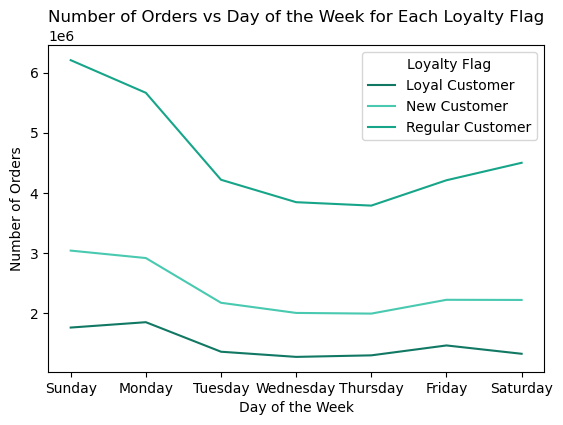

In [246]:
# create stacked line chart for loyalty flag orders per day of week
Loyalty_day_group.plot(kind = 'line', stacked = True, color = ['#117864', '#48C9B0', '#17A589'])

# adjust plot size
plt.subplots_adjust(bottom=0.2)

# change x tick to weekday names
day_names = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
Loyalty_day_group = Loyalty_day_group.rename(index=day_names)

# add title to axis labels and title
plt.title('Number of Orders vs Day of the Week for Each Loyalty Flag')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')

# add legend title
plt.legend(title='Loyalty Flag')

# save figure
plt.savefig(r'C:\Users\kacie\Box\Personal\CareerFoundry\Data Immersion\Achievement 4\Jupyter Folders\New Visualzations\loyalty_day_group.png')

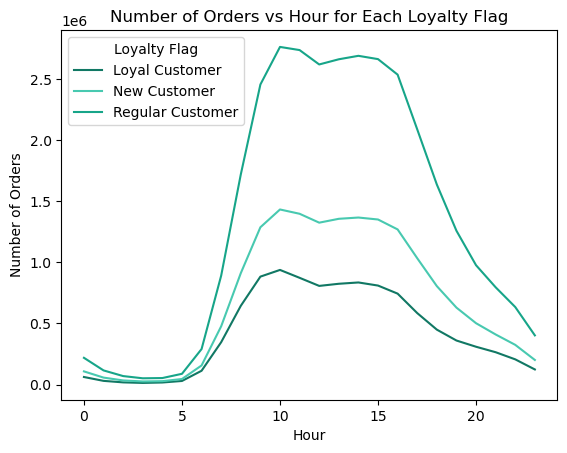

In [247]:
# create stacked line chart for orders per hour for each loyalty flag
Loyalty_hour_group = ord_prod_full.groupby(['order_hour', 'loyalty_flag']).size().unstack()

Loyalty_hour_group.plot(kind = 'line', stacked = True, color = ['#117864', '#48C9B0', '#17A589'])

# add axis label and title and legend
plt.title('Number of Orders vs Hour for Each Loyalty Flag')
plt.xlabel('Hour')
plt.ylabel('Number of Orders')

plt.legend(title='Loyalty Flag')

# save figure
plt.savefig(r'C:\Users\kacie\Box\Personal\CareerFoundry\Data Immersion\Achievement 4\Jupyter Folders\New Visualzations\loyalty_hour_group.png')

## Visualizations for Region

In [113]:
# import data table with regions other flags added
ord_prod_new = pd.read_pickle(r'C:\Users\kacie\Box\Personal\CareerFoundry\Data Immersion\Achievement 4\Jupyter Folders\Data\Prepared Data\ord_prod_full.pkl')

In [115]:
# list columns for new table
ord_prod_new.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'Busiest_Days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'spending_mean',
       'spending_flag', 'frequency_median', 'frequency_flag', 'Gender',
       'STATE', 'Age', 'date_joined', 'n_dependants', 'fam_status', 'income',
       '_merge', 'Region', 'shopping_behavior', 'lifestyle'],
      dtype='object')

In [127]:
# create table of average order prices by region
Region_ord_prices = ord_prod_new.groupby(['Region', 'user_id', 'order_id'])['prices'].sum().reset_index()
Region_cust_prices = Region_ord_prices.groupby(['Region', 'user_id'])['prices'].mean().reset_index()
Region_avg_prices = Region_cust_prices.groupby('Region')['prices'].mean().reset_index()

In [128]:
Region_avg_prices

,Region,prices
0,Midwest,80.171237
1,Northeast,79.802030
2,South,79.883234
3,West,79.914941


In [130]:
Region_avg_prices.set_index('Region', inplace=True)

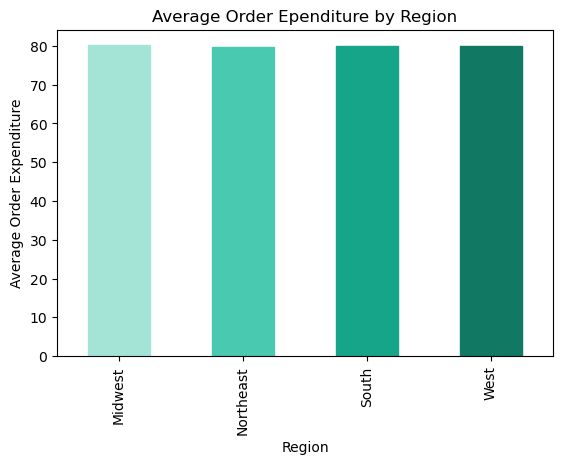

In [250]:
# create bar chart for average order price perregion 
Reg_prices_bar = Region_avg_prices.sort_index().plot.bar()

plt.subplots_adjust(bottom=0.2)

Reg_prices_bar.set_xlabel('Region')
Reg_prices_bar.set_ylabel('Average Order Expenditure')
Reg_prices_bar.set_title('Average Order Ependiture by Region')

Reg_prices_bar.legend().set_visible(False)

colors = ['#A3E4D7', '#48C9B0', '#17A589', '#117864']
for bar, color in zip(Reg_prices_bar.containers[0], colors):
    bar.set_color(color)

In [255]:
Region_day_group = ord_prod_new.groupby(['order_day_of_week', 'Region']).size().unstack()

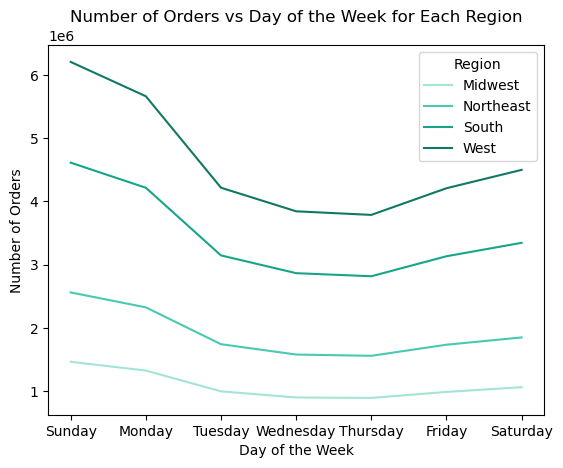

In [257]:
# create stacked line chart for order number per day per region
day_names = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
Region_day_group = Region_day_group.rename(index=day_names)

Region_day_group.plot(kind = 'line', stacked = True, color = ['#A3E4D7', '#48C9B0', '#17A589', '#117864'])

plt.title('Number of Orders vs Day of the Week for Each Region')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')

plt.legend(title='Region')

plt.savefig(r'C:\Users\kacie\Box\Personal\CareerFoundry\Data Immersion\Achievement 4\Jupyter Folders\New Visualzations\Reg_day_group.png')

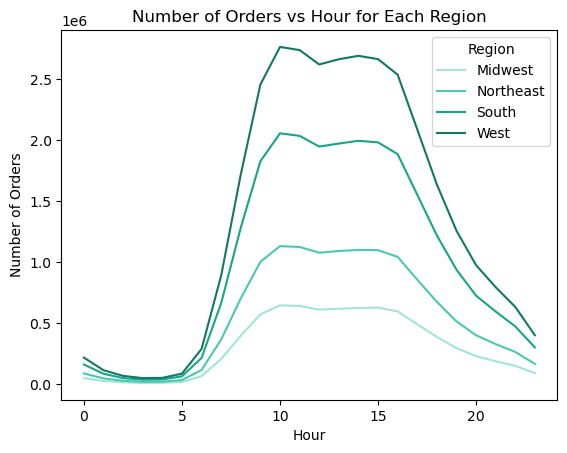

In [258]:
# create stacked line chart for order number per hour for each region
Region_hour_group = ord_prod_new.groupby(['order_hour', 'Region']).size().unstack()

Region_hour_group.plot(kind = 'line', stacked = True, color = ['#A3E4D7', '#48C9B0', '#17A589', '#117864'])

plt.title('Number of Orders vs Hour for Each Region')
plt.xlabel('Hour')
plt.ylabel('Number of Orders')

plt.legend(title='Region')

plt.savefig(r'C:\Users\kacie\Box\Personal\CareerFoundry\Data Immersion\Achievement 4\Jupyter Folders\New Visualzations\Reg_hour_group.png')

In [142]:
ord_prod_new['Age'].value_counts()

Age
49    531765
79    530305
48    530289
31    528995
64    528434
       ...  
60    484885
36    484265
66    476790
41    475661
25    472727
Name: count, Length: 64, dtype: int64

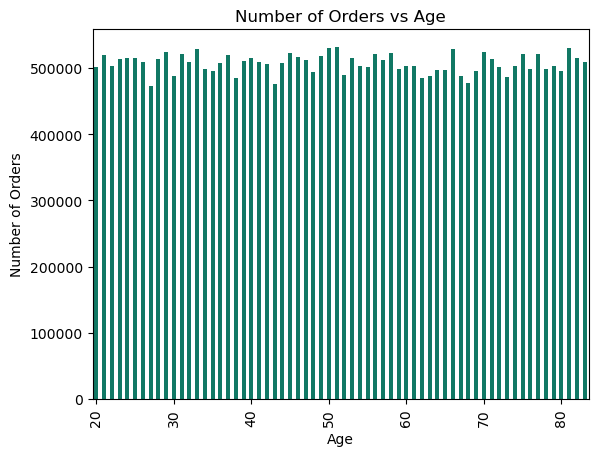

In [259]:
# create bar chart for order number per age
age_orders_bar = ord_prod_new['Age'].value_counts().sort_index().plot.bar(color = '#117864')

# Set custom x-ticks
display_ages = [20, 30, 40, 50, 60, 70, 80]
plt.xticks(ticks=[i-20 for i in display_ages], labels=display_ages) 

plt.xlabel('Age')
plt.ylabel('Number of Orders')
plt.title('Number of Orders vs Age')

plt.savefig(r'C:\Users\kacie\Box\Personal\CareerFoundry\Data Immersion\Achievement 4\Jupyter Folders\New Visualzations\Age_orders.png')

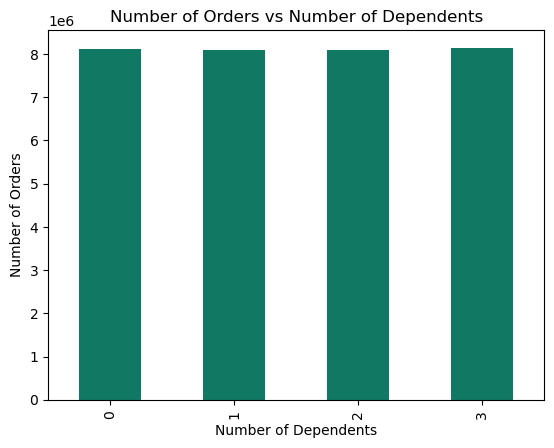

In [262]:
# create order number per number of dependents
Dep_orders_bar = ord_prod_new['n_dependants'].value_counts().sort_index().plot.bar(color = '#117864')


plt.xlabel('Number of Dependents')
plt.ylabel('Number of Orders')
plt.title('Number of Orders vs Number of Dependents')

plt.savefig(r'C:\Users\kacie\Box\Personal\CareerFoundry\Data Immersion\Achievement 4\Jupyter Folders\New Visualzations\Ord_Dep_group.png')

Text(0.5, 1.0, 'Number of Orders by Number of Dependents')

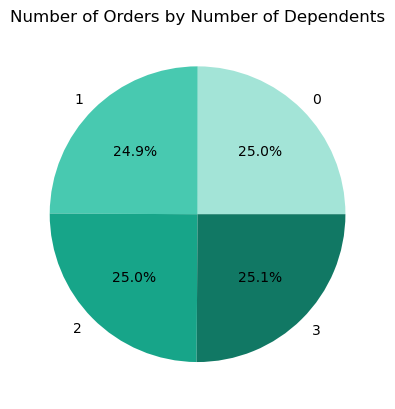

In [176]:
# create pie chart for number of dependents
Dep_counts = ord_prod_new['n_dependants'].value_counts().sort_index()

plt.pie(Dep_counts,labels = Dep_counts.index, autopct='%1.1f%%', colors=['#A3E4D7', '#48C9B0', '#17A589','#117864'])

plt.title('Number of Orders by Number of Dependents')

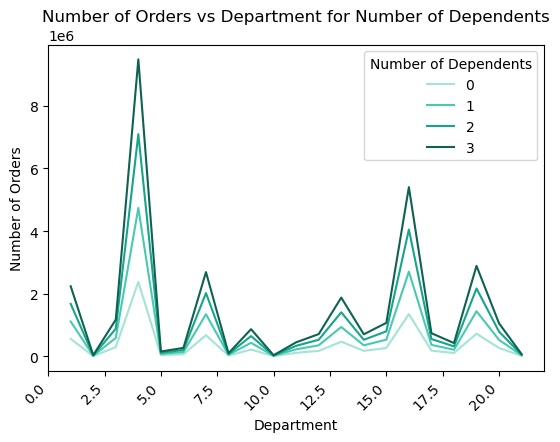

In [263]:
# create stacked line chart for order per department for number of dependents
Dep_dep_group = ord_prod_new.groupby(['department_id', 'n_dependants']).size().unstack()

Dep_dep_group.plot(kind = 'line', stacked = True, color = ['#A3E4D7', '#48C9B0', '#17A589','#0E6251'])

plt.subplots_adjust(bottom=0.2)

plt.title('Number of Orders vs Department for Number of Dependents')
plt.xlabel('Department')
plt.ylabel('Number of Orders')


plt.xticks(rotation=45, ha='right')


plt.legend(title='Number of Dependents')

plt.savefig(r'C:\Users\kacie\Box\Personal\CareerFoundry\Data Immersion\Achievement 4\Jupyter Folders\New Visualzations\Dep_Dep_group.png')

In [200]:
age_price_avg = ord_prod_new.groupby('Age')['prices'].mean().reset_index()

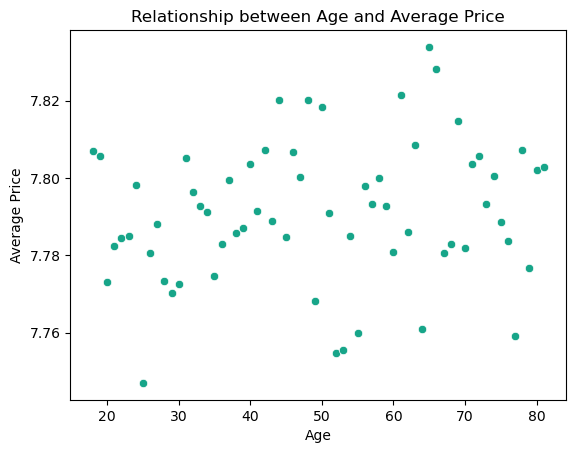

In [264]:
# create scatter plot for average order expense per age
age_price_scatter = sns.scatterplot(x = 'Age', y = 'prices', data = age_price_avg, color = '#17A589')

age_price_scatter.set_xlabel('Age')
age_price_scatter.set_ylabel('Average Price')
age_price_scatter.set_title('Relationship between Age and Average Price')

plt.savefig(r'C:\Users\kacie\Box\Personal\CareerFoundry\Data Immersion\Achievement 4\Jupyter Folders\New Visualzations\Age_Price_scatter.png')

plt.show()

In [205]:
income_price_avg = ord_prod_new.groupby('income')['prices'].mean().reset_index()

In [206]:
income_price_avg.head()

,income,prices
0,25903,3.375000
1,25911,6.675000
2,25937,6.982051
3,25941,5.677419
4,25955,6.907143


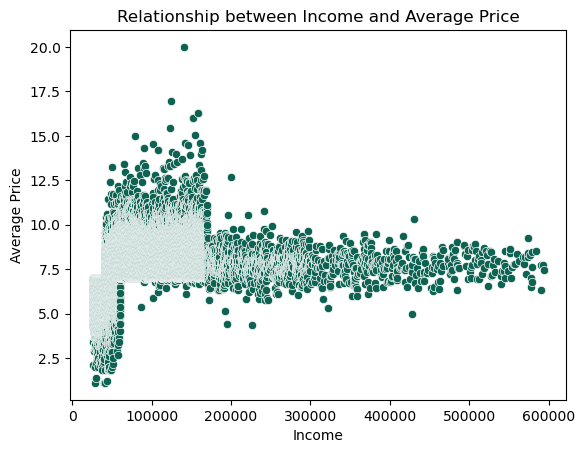

In [265]:
# create scatter plot for average price per income
income_price_scatter = sns.scatterplot(x = 'income', y = 'prices', data = income_price_avg, color = '#0E6251')

income_price_scatter.set_xlabel('Income')
income_price_scatter.set_ylabel('Average Price')
income_price_scatter.set_title('Relationship between Income and Average Price')

plt.savefig(r'C:\Users\kacie\Box\Personal\CareerFoundry\Data Immersion\Achievement 4\Jupyter Folders\New Visualzations\Income_Price_scatter.png')

plt.show()

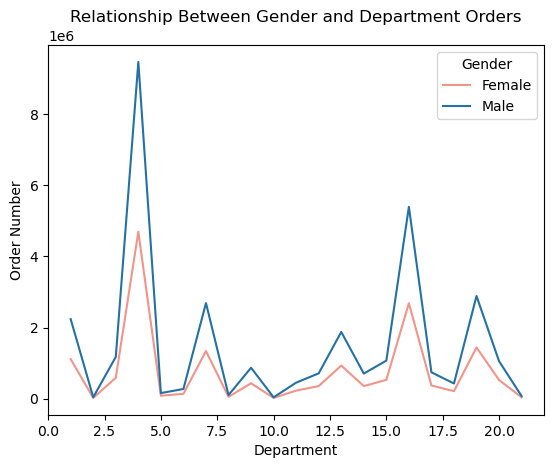

In [266]:
# creat stacked line chart for order number by department for genders
gen_dep_group = ord_prod_new.groupby(['department_id', 'Gender']).size().unstack()
gen_dep_group.scatter = gen_dep_group.plot(kind = 'line', stacked = True, color = ['#F1948A', '#2471A3'])

plt.xlabel('Department')
plt.ylabel('Order Number')
plt.title('Relationship Between Gender and Department Orders')

plt.legend(title='Gender')

plt.savefig(r'C:\Users\kacie\Box\Personal\CareerFoundry\Data Immersion\Achievement 4\Jupyter Folders\New Visualzations\gen_dep_line.png')


In [221]:
order_day_bar.figure.savefig(r'C:\Users\kacie\Box\Personal\CareerFoundry\Data Immersion\Achievement 4\Jupyter Folders\New Visualzations\order_day_bar.png')

In [219]:
order_hour_bar.figure.savefig(r'C:\Users\kacie\Box\Personal\CareerFoundry\Data Immersion\Achievement 4\Jupyter Folders\New Visualzations\order_hour_bar.png')

In [222]:
hour_price_bar.figure.savefig(r'C:\Users\kacie\Box\Personal\CareerFoundry\Data Immersion\Achievement 4\Jupyter Folders\New Visualzations\hour_price_bar.png')

In [240]:
dep_ord_bar.figure.savefig(r'C:\Users\kacie\Box\Personal\CareerFoundry\Data Immersion\Achievement 4\Jupyter Folders\New Visualzations\dep_order_bar.png')

In [242]:
loyalty_price_bar.figure.savefig(r'C:\Users\kacie\Box\Personal\CareerFoundry\Data Immersion\Achievement 4\Jupyter Folders\New Visualzations\loyalty_price_bar.png')

In [251]:
Reg_prices_bar.figure.savefig(r'C:\Users\kacie\Box\Personal\CareerFoundry\Data Immersion\Achievement 4\Jupyter Folders\New Visualzations\Reg_prices_bar.png')